In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

##### Below are 2 datasets scl and new_scl,  `scl` is the original and `new_scl` is the randomly derived data from the original

In [5]:
scl = pd.read_csv('scl90_osf.csv')
new_scl = pd.read_csv('SCL90data1.csv')

In [6]:
scl.head().iloc[:,11:101]

,SCL01,SCL02,SCL03,SCL04,SCL05,SCL06,SCL07,SCL08,SCL09,SCL10,...,SCL81,SCL82,SCL83,SCL84,SCL85,SCL86,SCL87,SCL88,SCL89,SCL90
0,3.0,0.0,3.0,3.0,2.0,0.0,0.0,0.0,2.0,0.0,...,0,3.0,0,0.0,0.0,2.0,0.0,0,0.0,0
1,2.0,2.0,1.0,3.0,1.0,1.0,1.0,0.0,3.0,2.0,...,0,4.0,2,0.0,1.0,1.0,1.0,0,4.0,2
2,2.0,3.0,2.0,0.0,4.0,2.0,3.0,2.0,3.0,3.0,...,0,2.0,2,2.0,0.0,0.0,2.0,0,2.0,1
3,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,2
4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,1


In [7]:
new_scl.head().iloc[:,11:101]

,SCL01,SCL02,SCL03,SCL04,SCL05,SCL06,SCL07,SCL08,SCL09,SCL10,...,SCL81,SCL82,SCL83,SCL84,SCL85,SCL86,SCL87,SCL88,SCL89,SCL90
0,3.0,0.0,3.0,3.0,2.0,0.0,0.0,0.0,2.0,0.0,...,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0,0.0,0
1,2.0,2.0,1.0,3.0,1.0,1.0,1.0,0.0,3.0,2.0,...,0.0,4.0,2.0,0.0,1.0,1.0,1.0,0,4.0,2
2,2.0,3.0,2.0,0.0,4.0,2.0,3.0,2.0,3.0,3.0,...,0.0,2.0,2.0,2.0,0.0,0.0,2.0,0,2.0,1
3,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2
4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1


In [8]:
scl.shape, new_scl.shape

((611, 139), (2444, 139))

In [9]:
scl_only = scl.iloc[:,11:101]

new_scl_only = new_scl.iloc[:,11:101]

In [14]:
# 12*2,10*2,9*2,13*2,10*2,6*2,7*2,2*6,2*10,2*7

* 12 - Som
* 10 - Ocd
* 9 - IPS
* 13 - Dep
* 10 - Anx
* 6 - AH
* 7 - PAnx
* 6 - PI
* 10 - P
* 7 - ADD

#### Calculation for mental illness for both datasets

In [10]:
som_index = scl_only[scl_only.iloc[:,[0,3,11,26,39,41,47,48,51,52,55,57]].sum(axis=1)>=24].index
ocd_index = scl_only[scl_only.iloc[:,[2,8,9,27,37,44,45,50,54,64]].sum(axis=1)>=20].index
ips_index = scl_only[scl_only.iloc[:,[5,20,33,35,36,40,60,68,72]].sum(axis=1)>=18].index
dep_index = scl_only[scl_only.iloc[:,[4,13,14,19,21,25,28,29,30,31,53,70,78]].sum(axis=1)>=26].index
anx_index = scl_only[scl_only.iloc[:,[1,16,22,32,38,56,71,77,79,85]].sum(axis=1)>=20].index
ah_index = scl_only[scl_only.iloc[:,[10,23,62,66,73,80]].sum(axis=1)>=12].index
panx_index = scl_only[scl_only.iloc[:,[12,24,46,49,69,74,81]].sum(axis=1)>=14].index
pi_index = scl_only[scl_only.iloc[:,[7,17,42,67,75,82]].sum(axis=1)>=12].index
p_index = scl_only[scl_only.iloc[:,[6,15,34,61,76,83,84,86,87,89]].sum(axis=1)>=20].index
add_index = scl_only[scl_only.iloc[:,[18,43,58,59,63,65,88]].sum(axis=1)>=14].index


scl_only['som'] = [1 if x in som_index else 0 for x in range(scl_only.shape[0])]
scl_only['ocd'] = [1 if x in ocd_index else 0 for x in range(scl_only.shape[0])]
scl_only['ips'] = [1 if x in ips_index else 0 for x in range(scl_only.shape[0])]
scl_only['dep'] = [1 if x in dep_index else 0 for x in range(scl_only.shape[0])]
scl_only['anx'] = [1 if x in anx_index else 0 for x in range(scl_only.shape[0])]
scl_only['ah'] = [1 if x in ah_index else 0 for x in range(scl_only.shape[0])]
scl_only['panx'] = [1 if x in panx_index else 0 for x in range(scl_only.shape[0])]
scl_only['pi'] = [1 if x in pi_index else 0 for x in range(scl_only.shape[0])]
scl_only['p'] = [1 if x in p_index else 0 for x in range(scl_only.shape[0])]
scl_only['add'] = [1 if x in add_index else 0 for x in range(scl_only.shape[0])]

In [11]:
new_som_index = new_scl_only[new_scl_only.iloc[:,[0,3,11,26,39,41,47,48,51,52,55,57]].sum(axis=1)>=24].index
new_ocd_index = new_scl_only[new_scl_only.iloc[:,[2,8,9,27,37,44,45,50,54,64]].sum(axis=1)>=20].index
new_ips_index = new_scl_only[new_scl_only.iloc[:,[5,20,33,35,36,40,60,68,72]].sum(axis=1)>=18].index
new_dep_index = new_scl_only[new_scl_only.iloc[:,[4,13,14,19,21,25,28,29,30,31,53,70,78]].sum(axis=1)>=26].index
new_anx_index = new_scl_only[new_scl_only.iloc[:,[1,16,22,32,38,56,71,77,79,85]].sum(axis=1)>=20].index
new_ah_index = new_scl_only[new_scl_only.iloc[:,[10,23,62,66,73,80]].sum(axis=1)>=12].index
new_panx_index = new_scl_only[new_scl_only.iloc[:,[12,24,46,49,69,74,81]].sum(axis=1)>=14].index
new_pi_index = new_scl_only[new_scl_only.iloc[:,[7,17,42,67,75,82]].sum(axis=1)>=12].index
new_p_index = new_scl_only[new_scl_only.iloc[:,[6,15,34,61,76,83,84,86,87,89]].sum(axis=1)>=20].index
new_add_index = new_scl_only[new_scl_only.iloc[:,[18,43,58,59,63,65,88]].sum(axis=1)>=14].index


new_scl_only['som'] = [1 if x in new_som_index else 0 for x in range(new_scl_only.shape[0])]
new_scl_only['ocd'] = [1 if x in new_ocd_index else 0 for x in range(new_scl_only.shape[0])]
new_scl_only['ips'] = [1 if x in new_ips_index else 0 for x in range(new_scl_only.shape[0])]
new_scl_only['dep'] = [1 if x in new_dep_index else 0 for x in range(new_scl_only.shape[0])]
new_scl_only['anx'] = [1 if x in new_anx_index else 0 for x in range(new_scl_only.shape[0])]
new_scl_only['ah'] = [1 if x in new_ah_index else 0 for x in range(new_scl_only.shape[0])]
new_scl_only['panx'] = [1 if x in new_panx_index else 0 for x in range(new_scl_only.shape[0])]
new_scl_only['pi'] = [1 if x in new_pi_index else 0 for x in range(new_scl_only.shape[0])]
new_scl_only['p'] = [1 if x in new_p_index else 0 for x in range(new_scl_only.shape[0])]
new_scl_only['add'] = [1 if x in new_add_index else 0 for x in range(new_scl_only.shape[0])]

In [12]:
scl_only.isnull().sum().sum(), new_scl_only.isnull().sum().sum()

(147, 588)

In [13]:
scl_only.dropna(inplace=True)
print( scl_only.isnull().sum().sum() )

new_scl_only.dropna(inplace=True)
print( new_scl_only.isnull().sum().sum() )

0
0


In [15]:
# scl_only.to_csv('scl_roginal_op.csv', index=False)

In [19]:
X = scl_only.iloc[:,0:90]
y = scl_only.iloc[:,90:]

In [20]:
new_X = new_scl_only.iloc[:,0:90]
new_y = new_scl_only.iloc[:,90:]

In [21]:
X, X_val, y, y_val = train_test_split(X, y, test_size=0.25, random_state=24)
X.shape , X_val.shape , y.shape , y_val.shape 

((407, 90), (136, 90), (407, 10), (136, 10))

In [22]:
X_, X_val_, y_, y_val_ = train_test_split(new_X, new_y, test_size=0.25, random_state=24)
X_.shape , X_val_.shape , y_.shape , y_val_.shape 

((1629, 90), (543, 90), (1629, 10), (543, 10))

#### We are keeping the model same but changing the number of columns

In [23]:
def result(model, X, y, X_val, y_val, f):
    X, X_val = X.iloc[:,:f], X_val.iloc[:,:f]
    
    model.fit(X,y)
    
    y_pred = model.predict(X_val)
    
    acc = accuracy_score(y_val, y_pred)
    
#     print(f'Model Accuracy with {f} columns out of 90 is {acc}')
    
    return np.round( (acc*100), 3)

In [25]:
result_model1 = {}
for i in tqdm(range(1,91)):
    result_score1 = result(
    MultiOutputClassifier(RandomForestClassifier()),
    X,
    y,
    X_val,
    y_val,
    i
    )

    result_model1[f'{i}_num_col'] = result_score1  

100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [01:51<00:00,  1.24s/it]


In [26]:
result_model2 = {}
for i in tqdm(range(1,91)):
    result_score2 = result(
    MultiOutputClassifier(RandomForestClassifier()),
    X_,
    y_,
    X_val_,
    y_val_,
    i
    )

    result_model2[f'{i}_num_col'] = result_score2  

100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [03:16<00:00,  2.18s/it]


In [27]:
result_log1 = pd.DataFrame(
    result_model1.values(),
    index=result_model1.keys(),
    columns = ['accuracy_score']
).reset_index()

index = result_log1['index']
result_log1['col_num'] = index
result_log1.drop(columns=['index'], axis=1, inplace=True)

result_log1.head()

,accuracy_score,col_num
0,58.824,1_num_col
1,55.147,2_num_col
2,55.147,3_num_col
3,55.147,4_num_col
4,55.147,5_num_col


In [28]:
result_log2 = pd.DataFrame(
    result_model2.values(),
    index=result_model2.keys(),
    columns = ['accuracy_score']
).reset_index()

index = result_log2['index']
result_log2['col_num'] = index
result_log2.drop(columns=['index'], axis=1, inplace=True)

result_log2.head()

,accuracy_score,col_num
0,70.902,1_num_col
1,69.429,2_num_col
2,68.877,3_num_col
3,68.508,4_num_col
4,69.061,5_num_col


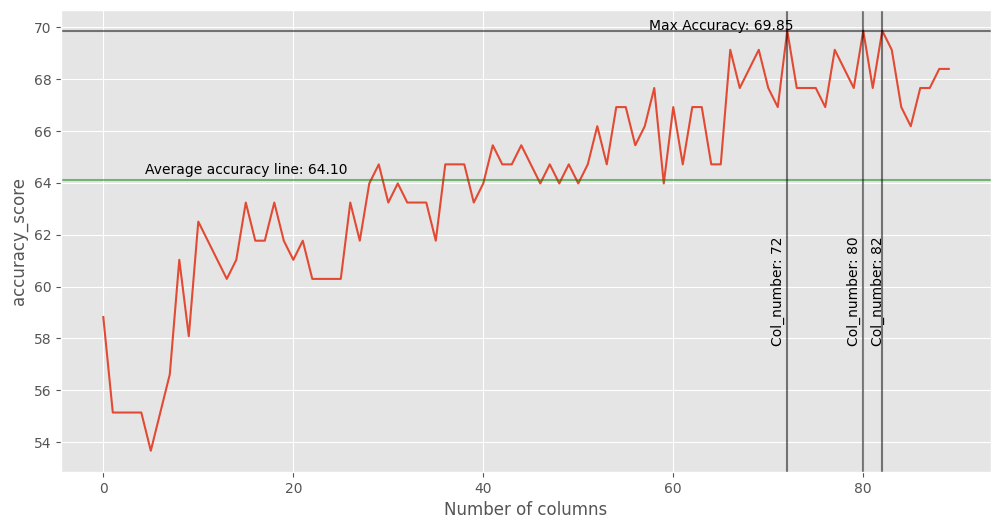

In [44]:
plt.figure(figsize=(12,6))

sns.lineplot(result_log1['accuracy_score'])

max_acc = result_log1['accuracy_score'].max()
avg = result_log1['accuracy_score'].mean()
a,b,c = result_log1[result_log1['accuracy_score']==result_log1['accuracy_score'].max()].index

plt.axhline(y = max_acc, c='black', alpha=0.5)
plt.axhline(y = avg, c='green', alpha=0.5)
plt.axvline(x = a, c='black', alpha=0.5)
plt.axvline(x = b, c='black', alpha=0.5)
plt.axvline(x = c, c='black', alpha=0.5)


plt.annotate(f'Max Accuracy: {max_acc:.2f}',
             xy=(len(result_log1['accuracy_score']) - 25, max_acc),
             xytext=(len(result_log1['accuracy_score']) - 25, max_acc + 0.02),
             ha='center')
plt.annotate(f'Average accuracy line: {avg:.2f}',
             xy=(len(result_log1['accuracy_score']) - 25, max_acc),
             xytext=(len(result_log1['accuracy_score']) - 75, max_acc - 5.5),
             ha='center')

plt.annotate(f'Col_number: {a}',
             xy=(len(result_log1['accuracy_score']) - 1, max_acc),
             xytext=(len(result_log1['accuracy_score']) - 19, max_acc - 12),
             ha='center', rotation=90)

plt.annotate(f'Col_number: {b}',
             xy=(len(result_log1['accuracy_score']) - 1, max_acc),
             xytext=(len(result_log1['accuracy_score']) - 11, max_acc - 12),
             ha='center', rotation=90)

plt.annotate(f'Col_number: {c}',
             xy=(len(result_log1['accuracy_score']) - 1, max_acc),
             xytext=(len(result_log1['accuracy_score']) - 8.5, max_acc - 12),
             ha='center', rotation=90)


plt.xlabel('Number of columns')
plt.show()

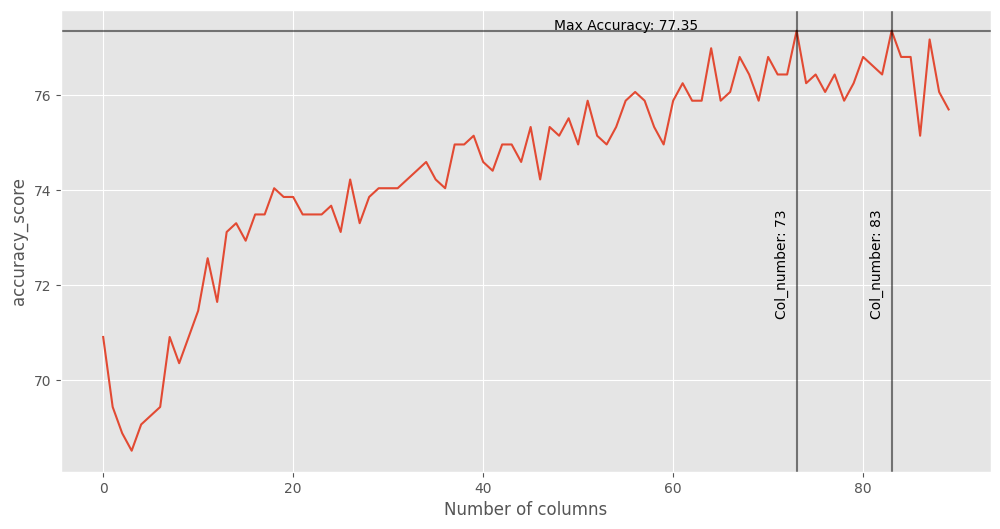

In [52]:
plt.figure(figsize=(12,6))

sns.lineplot(result_log2['accuracy_score'])

max_acc = result_log2['accuracy_score'].max()
avg = result_log2['accuracy_score'].mean()
# a,b,c,d = result_log2[result_log2['accuracy_score']==result_log2['accuracy_score'].max()].index
a,b = result_log2[result_log2['accuracy_score']==result_log2['accuracy_score'].max()].index

plt.axhline(y = max_acc, c='black', alpha=0.5)
# plt.axhline(y = avg, c='green', alpha=0.5)
plt.axvline(x = a, c='black', alpha=0.5)
plt.axvline(x = b, c='black', alpha=0.5)
# plt.axvline(x = c, c='black', alpha=0.5)
# plt.axvline(x = d, c='black', alpha=0.5)


plt.annotate(f'Max Accuracy: {max_acc:.2f}',
             xy=(len(result_log1['accuracy_score']) - 25, max_acc),
             xytext=(len(result_log1['accuracy_score']) - 35, max_acc + 0.02),
             ha='center')
# plt.annotate(f'Average accuracy line: {avg:.2f}',
#              xy=(len(result_log1['accuracy_score']) - 25, max_acc),
#              xytext=(len(result_log1['accuracy_score']) - 75, max_acc - 5.5),
#              ha='center')

plt.annotate(f'Col_number: {a}',
             xy=(len(result_log1['accuracy_score']) - 1, max_acc),
             xytext=(len(result_log1['accuracy_score']) - 18.5, max_acc - 6),
             ha='center', rotation=90)

plt.annotate(f'Col_number: {b}',
             xy=(len(result_log1['accuracy_score']) - 1, max_acc),
             xytext=(len(result_log1['accuracy_score']) - 8.5, max_acc - 6),
             ha='center', rotation=90)

# plt.annotate(f'Col_number: {c}',
#              xy=(len(result_log1['accuracy_score']) - 1, max_acc),
#              xytext=(len(result_log1['accuracy_score']) - 12.5, max_acc - 6),
#              ha='center', rotation=90)

# plt.annotate(f'Col_number: {d}',
#              xy=(len(result_log1['accuracy_score']) - 1, max_acc),
#              xytext=(len(result_log1['accuracy_score']) - 9.5, max_acc - 6),
#              ha='center', rotation=90)


plt.xlabel('Number of columns')
plt.show()

## Let's do PCA (Principal component analysis) analysis 

In [151]:
pca = PCA(n_components=15)
pca.fit(X_.iloc[:,:15])

PCA(n_components=15)

In [152]:
with open('pca.pkl', 'wb') as f:
    pickle.dump(pca, f)

In [54]:
X_pca = pca.transform(X_)
x_pca = pd.DataFrame(X_pca, columns=X.columns[:90])

In [55]:
x_pca_val = pca.transform(X_val_)
x_pca_val = pd.DataFrame(x_pca_val, columns=X_val_.columns)

In [56]:
np.cumsum(pca.explained_variance_ratio_)
# pca.explained_variance_ratio_

array([0.35885746, 0.39633619, 0.4272735 , 0.45455542, 0.47664469,
       0.49305857, 0.50888073, 0.52443022, 0.53813627, 0.55088921,
       0.56331048, 0.57520002, 0.58684813, 0.5980131 , 0.60854471,
       0.61863985, 0.62847107, 0.63790038, 0.64714337, 0.65622556,
       0.66515249, 0.67381277, 0.68215837, 0.69043999, 0.69841455,
       0.70629739, 0.71385402, 0.72138324, 0.72864143, 0.73571865,
       0.74267904, 0.7495175 , 0.75615739, 0.76275962, 0.7692835 ,
       0.77568552, 0.78203573, 0.78825828, 0.79431489, 0.80024985,
       0.80608884, 0.81187474, 0.81746789, 0.82298579, 0.82836363,
       0.83367578, 0.83898742, 0.84421809, 0.84936313, 0.85442656,
       0.85945193, 0.8643703 , 0.86912583, 0.8738516 , 0.87852306,
       0.8831135 , 0.88762728, 0.8920703 , 0.89644463, 0.90077881,
       0.90509875, 0.90931734, 0.91347287, 0.91758533, 0.92160572,
       0.92556804, 0.92950252, 0.93333471, 0.93711509, 0.94078584,
       0.94437016, 0.94790088, 0.95136888, 0.9547923 , 0.95817

In [57]:
np.cumsum(sorted(pca.explained_variance_ratio_, reverse=False))

array([0.00214396, 0.00440944, 0.00683059, 0.00930197, 0.01192928,
       0.01460185, 0.01736234, 0.0202022 , 0.02312607, 0.02605756,
       0.02907358, 0.03216977, 0.03533807, 0.03854117, 0.04182542,
       0.0452077 , 0.04863112, 0.05209912, 0.05562984, 0.05921416,
       0.06288491, 0.06666529, 0.07049748, 0.07443196, 0.07839428,
       0.08241467, 0.08652713, 0.09068266, 0.09490125, 0.09922119,
       0.10355537, 0.1079297 , 0.11237272, 0.1168865 , 0.12147694,
       0.1261484 , 0.13087417, 0.1356297 , 0.14054807, 0.14557344,
       0.15063687, 0.15578191, 0.16101258, 0.16632422, 0.17163637,
       0.17701421, 0.18253211, 0.18812526, 0.19391116, 0.19975015,
       0.20568511, 0.21174172, 0.21796427, 0.22431448, 0.2307165 ,
       0.23724038, 0.24384261, 0.2504825 , 0.25732096, 0.26428135,
       0.27135857, 0.27861676, 0.28614598, 0.29370261, 0.30158545,
       0.30956001, 0.31784163, 0.32618723, 0.33484751, 0.34377444,
       0.35285663, 0.36209962, 0.37152893, 0.38136015, 0.39145

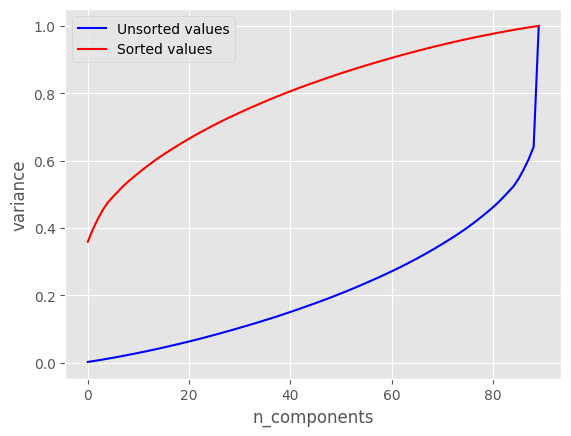

In [58]:
plt.plot(np.cumsum(sorted(pca.explained_variance_ratio_, reverse=False)), label='Unsorted values', c='blue')
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='Sorted values', c='red')

plt.xlabel('n_components')
plt.ylabel('variance')
# plt.axhline(y = 0.91347287, color = 'b') #, label = 'axvline - full height')
# plt.axvline(x = 62, color = 'r') #, label = 'axvline - full height')
plt.legend()
plt.show()

In [59]:
result_model_pca = {}
for i in tqdm(range(1,91)):
    result_score_pca = result(
    MultiOutputClassifier(RandomForestClassifier()),
    x_pca,
    y_,
    x_pca_val,
    y_val_,
    i
    )

    result_model_pca[f'{i}_num_col'] = result_score_pca  

100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [25:55<00:00, 17.28s/it]


In [60]:
result_log_pca = pd.DataFrame(
    result_model_pca.values(),
    index=result_model_pca.keys(),
    columns = ['accuracy_score']
).reset_index()

index = result_log_pca['index']
result_log_pca['col_num'] = index
result_log_pca.drop(columns=['index'], axis=1, inplace=True)

result_log_pca.head()

,accuracy_score,col_num
0,68.140,1_num_col
1,74.401,2_num_col
2,74.586,3_num_col
3,76.059,4_num_col
4,75.691,5_num_col


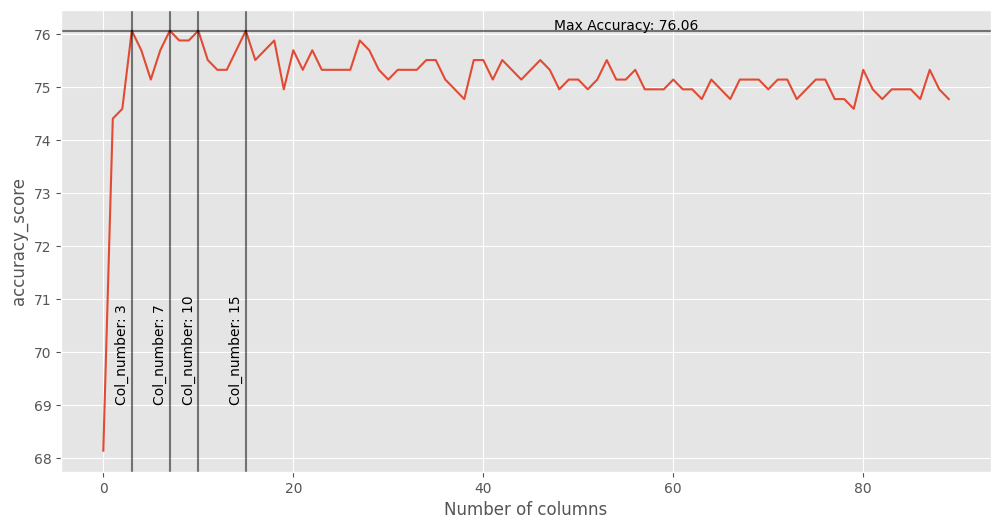

In [73]:
plt.figure(figsize=(12,6))

sns.lineplot(result_log_pca['accuracy_score'])

max_acc = result_log_pca['accuracy_score'].max()
avg = result_log_pca['accuracy_score'].mean()
# a = result_log_pca[result_log_pca['accuracy_score']==result_log_pca['accuracy_score'].max()].index[0]
a,b,c,d = result_log_pca[result_log_pca['accuracy_score']==result_log_pca['accuracy_score'].max()].index


plt.axhline(y = max_acc, c='black', alpha=0.5)
plt.axvline(x = a, c='black', alpha=0.5)
plt.axvline(x = b, c='black', alpha=0.5)
plt.axvline(x = c, c='black', alpha=0.5)
plt.axvline(x = d, c='black', alpha=0.5)



plt.annotate(f'Max Accuracy: {max_acc:.2f}',
             xy=(len(result_log_pca['accuracy_score']) - 25, max_acc),
             xytext=(len(result_log_pca['accuracy_score']) - 35, max_acc + 0.02),
             ha='center')

plt.annotate(f'Col_number: {a}',
             xy=(len(result_log_pca['accuracy_score']) - 1, max_acc),
             xytext=(len(result_log_pca['accuracy_score']) -88, max_acc - 7),
             ha='center', rotation=90)

plt.annotate(f'Col_number: {b}',
             xy=(len(result_log_pca['accuracy_score']) - 1, max_acc),
             xytext=(len(result_log_pca['accuracy_score']) -84, max_acc - 7),
             ha='center', rotation=90)

plt.annotate(f'Col_number: {c}',
             xy=(len(result_log_pca['accuracy_score']) - 1, max_acc),
             xytext=(len(result_log_pca['accuracy_score']) -81, max_acc - 7),
             ha='center', rotation=90)

plt.annotate(f'Col_number: {d}',
             xy=(len(result_log_pca['accuracy_score']) - 1, max_acc),
             xytext=(len(result_log_pca['accuracy_score']) -76, max_acc - 7),
             ha='center', rotation=90)

plt.xlabel('Number of columns')
plt.show()

## Let's do T-sne (T-distributed stochastic neighbour embedding) analysis 

In [74]:
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=300)

In [75]:
x_tsne = tsne.fit_transform(X_)

In [76]:
x_tsne_val = tsne.fit_transform(X_val_)

In [77]:
x_tsne_ = pd.DataFrame(x_tsne, columns=['col1','col2','col3'])
x_tsne_val_ = pd.DataFrame(x_tsne_val, columns=['col1','col2','col3'])

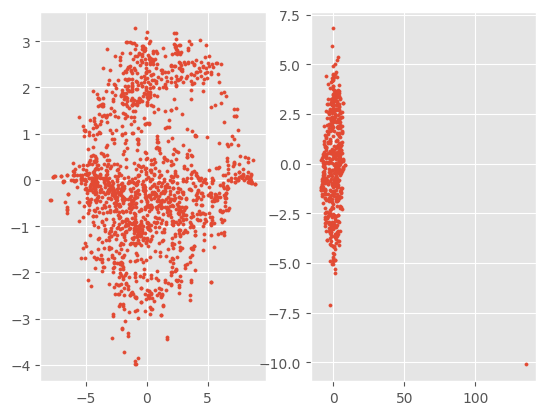

In [78]:
plt.subplot(121)
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], s= 5, cmap='Spectral')
plt.subplot(122)
plt.scatter(x_tsne_val[:, 0], x_tsne_val[:, 1], s= 5, cmap='Spectral')

plt.show()

In [79]:
result_model_tsne = {}
for i in tqdm(range(1,4)):
    result_score_tsne = result(
    MultiOutputClassifier(RandomForestClassifier()),
    x_tsne_,
    y_,
    x_tsne_val_,
    y_val_,
    i
    )

    result_model_tsne[f'{i}_num_col'] = result_score_tsne  

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.02s/it]


In [80]:
result_model_tsne

{'1_num_col': 35.543, '2_num_col': 41.252, '3_num_col': 45.12}

### Now We can optimize the predictor (Random_forest) 

In [105]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 7, 15],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [92]:
# Let's decide the best number of n_estimators 

for n in tqdm(param_grid['n_estimators']):
    m = MultiOutputClassifier(RandomForestClassifier(n_estimators=n) )
    m.fit(x_pca, y_)
    y_pred = m.predict(x_pca_val)
    acc = accuracy_score(y_val_, y_pred)
    print(f'Accuracy: {acc} with {n} number of n_estimators')
    
# n_estimators = 100

0.7532228360957642
0.7495395948434622
0.7476979742173112
0.7476979742173112


In [93]:
# Let's decide the best number of max_depth 

for n in tqdm(param_grid['max_depth']):
    m = MultiOutputClassifier(RandomForestClassifier(max_depth=n) )
    m.fit(x_pca, y_)
    y_pred = m.predict(x_pca_val)
    acc = accuracy_score(y_val_, y_pred)
    print(f'Accuracy: {acc} with {n} number of max_depth')
    
    
# max_depth = 20 

 25%|█████████████████████                                                               | 1/4 [00:33<01:40, 33.39s/it]

Accuracy: 0.7495395948434622 with None number of max_depth



 50%|██████████████████████████████████████████                                          | 2/4 [00:55<00:53, 26.63s/it]

Accuracy: 0.7403314917127072 with 10 number of max_depth



 75%|███████████████████████████████████████████████████████████████                     | 3/4 [01:25<00:28, 28.09s/it]

Accuracy: 0.7513812154696132 with 20 number of max_depth


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:54<00:00, 28.75s/it]

Accuracy: 0.7458563535911602 with 30 number of max_depth


In [97]:
## Let's decide the best number of min_samples_split 

for n in tqdm(param_grid['min_samples_split']):
    m = MultiOutputClassifier(RandomForestClassifier(min_samples_split=n) )
    m.fit(x_pca, y_)
    y_pred = m.predict(x_pca_val)
    acc = accuracy_score(y_val_, y_pred)
    print(f'Accuracy: {acc} with {n} number of min_samples_split')
  
# min_samples_split = 2

 20%|████████████████▊                                                                   | 1/5 [00:34<02:17, 34.42s/it]

Accuracy: 0.7532228360957642 with 2 number of min_samples_split



 40%|█████████████████████████████████▌                                                  | 2/5 [01:04<01:35, 31.70s/it]

Accuracy: 0.7495395948434622 with 5 number of min_samples_split



 60%|██████████████████████████████████████████████████▍                                 | 3/5 [01:34<01:01, 30.91s/it]

Accuracy: 0.7476979742173112 with 10 number of min_samples_split



 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [02:04<00:30, 30.56s/it]

Accuracy: 0.7476979742173112 with 7 number of min_samples_split


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:33<00:00, 30.73s/it]

Accuracy: 0.7495395948434622 with 15 number of min_samples_split


In [98]:
# Let's decide the best number of min_samples_leaf 

for n in tqdm(param_grid['min_samples_leaf']):
    m = MultiOutputClassifier(RandomForestClassifier(min_samples_leaf=n) )
    m.fit(x_pca, y_)
    y_pred = m.predict(x_pca_val)
    acc = accuracy_score(y_val_, y_pred)
    print(f'Accuracy: {acc} with {n} number of min_samples_leaf')
   
# min_samples_leaf = 2

 33%|████████████████████████████                                                        | 1/3 [00:30<01:00, 30.07s/it]

Accuracy: 0.7476979742173112 with 1 number of min_samples_leaf



 67%|████████████████████████████████████████████████████████                            | 2/3 [00:58<00:28, 28.98s/it]

Accuracy: 0.7513812154696132 with 2 number of min_samples_leaf


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:24<00:00, 28.16s/it]

Accuracy: 0.7476979742173112 with 4 number of min_samples_leaf


In [ ]:
# Let's decide the best number of bootstrap 

for n in tqdm(param_grid['bootstrap']):
    m = MultiOutputClassifier(RandomForestClassifier(bootstrap=n) )
    m.fit(x_pca, y_)
    y_pred = m.predict(x_pca_val)
    acc = accuracy_score(y_val_, y_pred)
    print(f'Accuracy: {acc} with {n} number of bootstrap')

# bootstrap = False

In [100]:
# Let's decide the best number of criterion 

for n in tqdm(param_grid['criterion']):
    m = MultiOutputClassifier(RandomForestClassifier(criterion=n) )
    m.fit(x_pca, y_)
    y_pred = m.predict(x_pca_val)
    acc = accuracy_score(y_val_, y_pred)
    print(f'Accuracy: {acc} with {n} number of criterion')
    
# criterion = gini

 50%|██████████████████████████████████████████                                          | 1/2 [00:30<00:30, 30.42s/it]

Accuracy: 0.7495395948434622 with gini number of criterion


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:53<00:00, 26.76s/it]

Accuracy: 0.7219152854511971 with entropy number of criterion


In [117]:
rf = RandomForestClassifier( 
    n_estimators = 100, 
    max_depth = 20, 
    min_samples_split = 2, 
    min_samples_leaf = 2, 
    bootstrap = False, 
    criterion = 'gini'
)

multi_rf = MultiOutputClassifier(rf)

In [145]:
multi_rf.fit(x_pca.iloc[:,:15], y_)

MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                       max_depth=20,
                                                       min_samples_leaf=2))

In [146]:
y_pred = multi_rf.predict(x_pca_val.iloc[:,:15])
acc = accuracy_score(y_val_, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.7550644567219152


In [147]:
import pickle

In [148]:
with open('model1.pkl', 'wb')as f:
    pickle.dump(multi_rf, f)

In [125]:
illnesses = {
    0: 'Somatization',
    1: 'Obsessive-Compulsive Disorder',
    2: 'Interpersonal Sensitivity',
    3: 'Depression',
    4: 'Anxiety',
    5: 'Anger-Hostility',
    6: 'Phobic Anxiety',
    7: 'Paranoid Ideation',
    8: 'Psychoticism',
    9: 'Additional Items'
}


In [139]:
y_.iloc[19,:].values

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [141]:
[x for x in y_pred[6]]

[1, 1, 0, 1, 1, 0, 0, 0, 0, 1]

['Somatization',
 'Obsessive-Compulsive Disorder',
 'Depression',
 'Anxiety',
 'Additional Items']

Somatization
Obsessive-Compulsive Disorder
Interpersonal Sensitivity
Depression
Anxiety
Anger-Hostility
Phobic Anxiety
Paranoid Ideation
Psychoticism
Additional Items
